# Preparación del dataset de ventas de vehículos

## 1. Librerias y configuraciones previas


In [62]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [63]:
## Cargar datos con colab
## =============================================================================

from google.colab import drive
import sys

# Path en google
PATH = '/gdrive/MyDrive/01_Academia/02_Cursos/20251001_AprendizajeAutomatico_UdeA/'

UTILS_PATH = PATH + 'utils/'
DATASET_PATH = PATH + 'datasets/'
MODELOS_PATH = PATH + 'modelos/'


# Montar Google Drive
drive.mount('/gdrive')

# Agregar utils al sys.path
sys.path.append(UTILS_PATH)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## 2. Funciones

In [64]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from funciones import multiple_plot

## 3. Carga del dataset

Este dataset extraido de *Kaggle* (nombrado: **car details v4.csv** ) contiene información sobre **vehículos usados**, los cuales serán usados para la predicción de precios de venta, a partir de las diferentes variables.

A continuación una breve descripción de las variables:

****
    
| Campo | Descripción | Ejempo |
| :--- | :--- |:--- |
| Make | Marca  | Honda |
| Model | Modelo  | Amaze 1.2 VX i-VTEC |
| Price | Precio  | 505000 |
| Year | Año  | 2017 |
| Kilometer | Kilometraje  | 87150 |
| Fuel Type | Tipo de combustible  | Petrol |
| Transmission | Tipo de transmisión  | Manual |
| Location | Ubicación  | Pune |
| Color | Color  | Grey |
| Owner | Número de propietarios previos  | First |
| Seller Type | Tipo de vendedor  | Corporate |
| Engine | Tipo de motor  | 1198 cc |
| Max Power | Potencia máxima del motor  | 87 bhp @ 6000 rpm |
| Max Torque | Torque máximo del motor  | 109 Nm @ 4500 rpm |
| Drivetrain | Tipo de tracción  | FWD |
| Length | Longitud  | 3990 |
| Width | Anchura  | 1680 |
| Height | Altura  | 1505 |
| Seating Capacity | Capacidad de asientos  | 5 |
| Fuel Tank Capacity | Capacidad del tanque de combustible  | 35 |

    
****

    
Url origen datos: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv


In [65]:
#Cargar el dataset
d = pd.read_csv(DATASET_PATH +'01_car details v4.csv')

In [66]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [67]:
d.head(2)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0000,1680.0000,1505.0000,5.0000,35.0000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0000,1695.0000,1555.0000,5.0000,42.0000


## 4. Limpieza de datos (Data Cleaning)

In [68]:
#Borrando columnas que no se utilizarán

d.drop([ 'Model', 'Location', 'Color', 'Max Power', 'Max Torque'], axis='columns', inplace=True)

In [69]:
#Se limpia la variable Engine para convertirla en una variable numérica

#Se borra todos los valores ' cc'
d['Engine'] = d['Engine'].str.replace(' cc', '')

#se convierte a variable tipo float
d['Engine'] = d['Engine'].astype('float64')
d["Engine"].dtype

dtype('float64')

In [70]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
258,BMW,2950000,2015,84700,Diesel,Automatic,Second,Individual,2993.0000,AWD,4886.0000,1938.0000,1762.0000,5.0000,NaN
923,Renault,315000,2017,15507,Petrol,Manual,First,Individual,799.0000,FWD,3679.0000,1579.0000,1478.0000,5.0000,28.0000
1217,Maruti Suzuki,725000,2019,11874,Petrol,Automatic,First,Individual,1197.0000,FWD,3840.0000,1735.0000,1530.0000,5.0000,37.0000
1555,Hyundai,649000,2020,52236,Petrol,Manual,First,Individual,1197.0000,FWD,3765.0000,1660.0000,1520.0000,5.0000,43.0000
1603,Mercedes-Benz,7475000,2021,13000,Diesel,Automatic,First,Individual,1950.0000,RWD,5063.0000,1860.0000,1494.0000,5.0000,80.0000
1856,Skoda,1390000,2017,56000,Petrol,Automatic,First,Individual,1798.0000,FWD,4670.0000,1814.0000,1476.0000,5.0000,50.0000


In [71]:
# eliminación de registros duplicados
d = d.drop_duplicates()

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

In [72]:
# Tasa de cambio de rupias a dólares
tasa_de_cambio = 0.012

d['Price'] = d['Price'] * tasa_de_cambio

In [73]:
d.head(2)

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,6060.0000,2017,87150,Petrol,Manual,First,Corporate,1198.0000,FWD,3990.0000,1680.0000,1505.0000,5.0000,35.0000
1,Maruti Suzuki,5400.0000,2014,75000,Diesel,Manual,Second,Individual,1248.0000,FWD,3995.0000,1695.0000,1555.0000,5.0000,42.0000


## 5. Visualización de datos

### Variables de entrada

In [74]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,Make,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Second,Individual,FWD


In [75]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,6060.0000,2017,87150,1198.0000,3990.0000,1680.0000,1505.0000,5.0000,35.0000
1,5400.0000,2014,75000,1248.0000,3995.0000,1695.0000,1555.0000,5.0000,42.0000
2,2640.0000,2011,67000,1197.0000,3585.0000,1595.0000,1550.0000,5.0000,35.0000
3,9588.0000,2019,37500,1197.0000,3995.0000,1745.0000,1510.0000,5.0000,37.0000
4,23400.0000,2018,69000,2393.0000,4735.0000,1830.0000,1795.0000,7.0000,55.0000


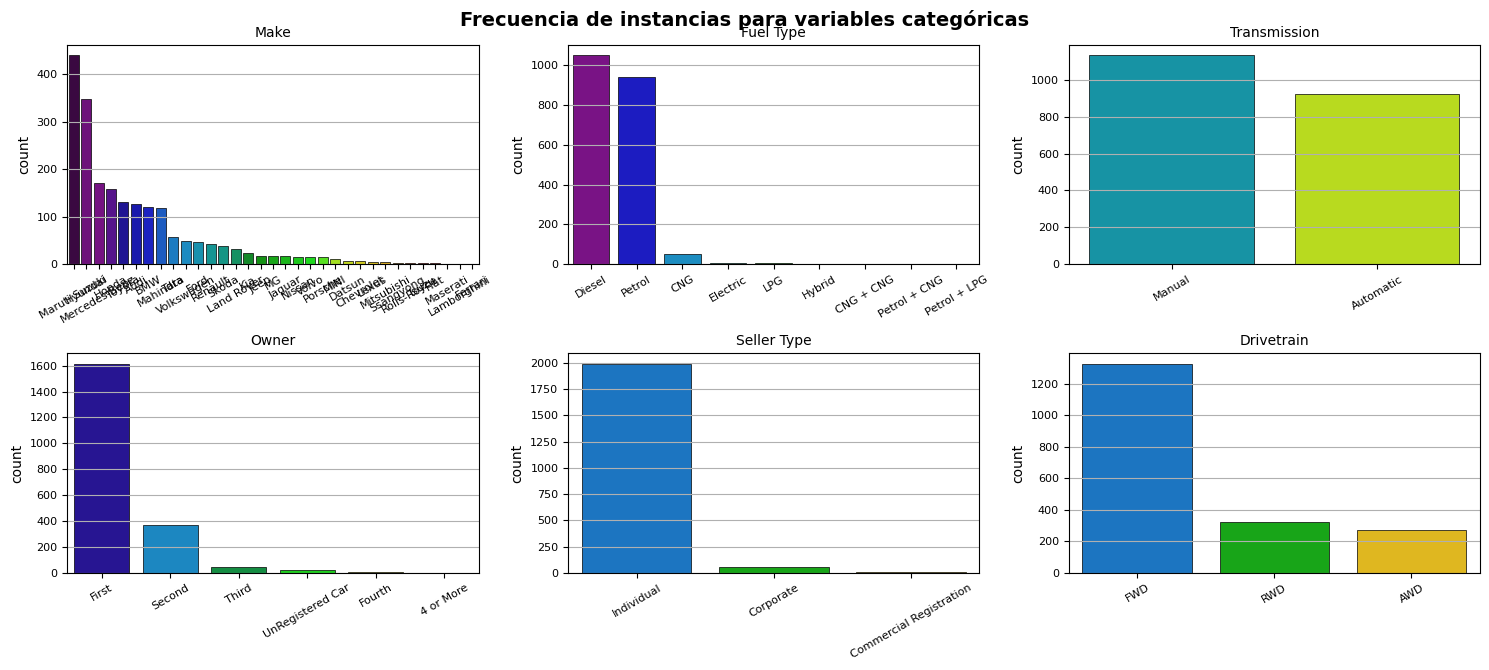

In [76]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [77]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== Make ====================
Make
Maruti Suzuki    439
Hyundai          348
Mercedes-Benz    170
Honda            158
Toyota           132
Audi             127
BMW              120
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           42
Skoda             39
Land Rover        33
Kia               23
Jeep              18
MG                17
Jaguar            17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Lamborghini        1
Ferrari            1
Name: count, dtype: int64

===== Fuel Type ====================
Fuel Type
Diesel          1047
Petrol           938
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: c

Text(0.5, 1.1, 'Distribución de la variable Make vs. el precio')

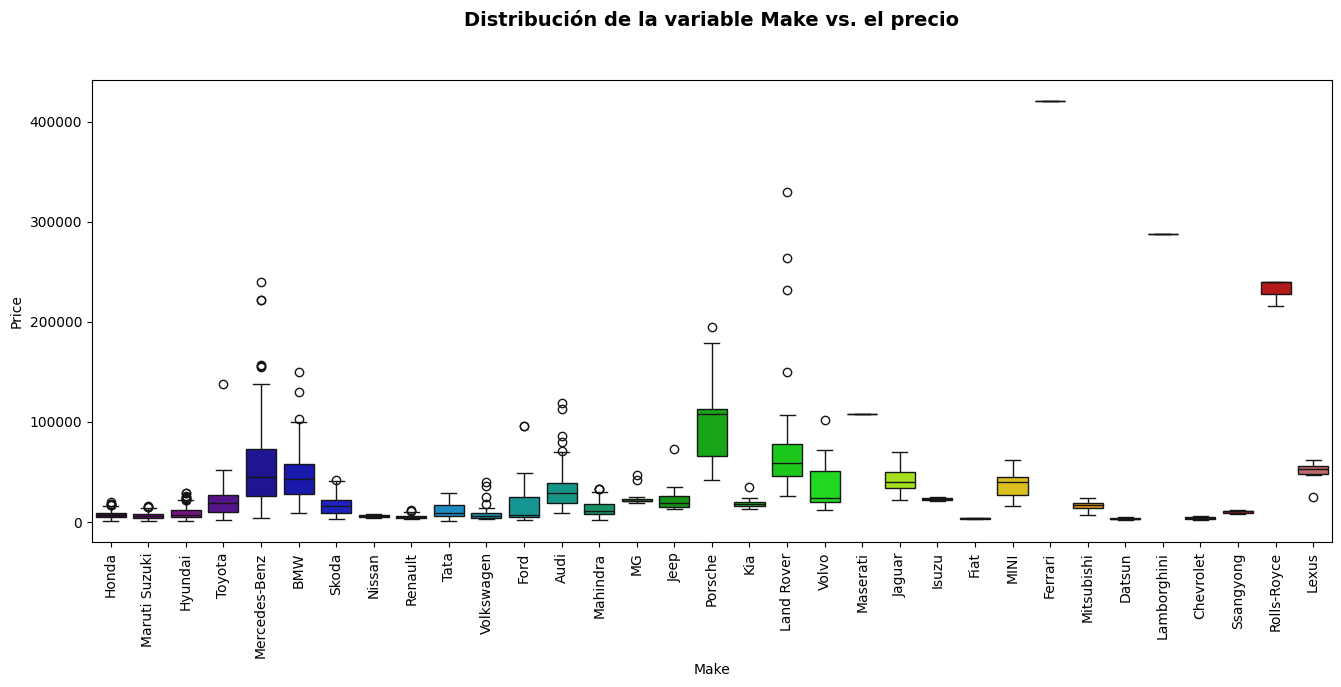

In [78]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
ax_cond = axes
sns.boxplot(data=d,
            x='Make',
            y='Price',
            ax=axes,
            palette='nipy_spectral',
            zorder=1
            )
# Personalizar el eje x
ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=90)
# Configurar título
ax_cond.set_title('Distribución de la variable Make vs. el precio', fontsize=14, fontweight="bold", y=1.1)

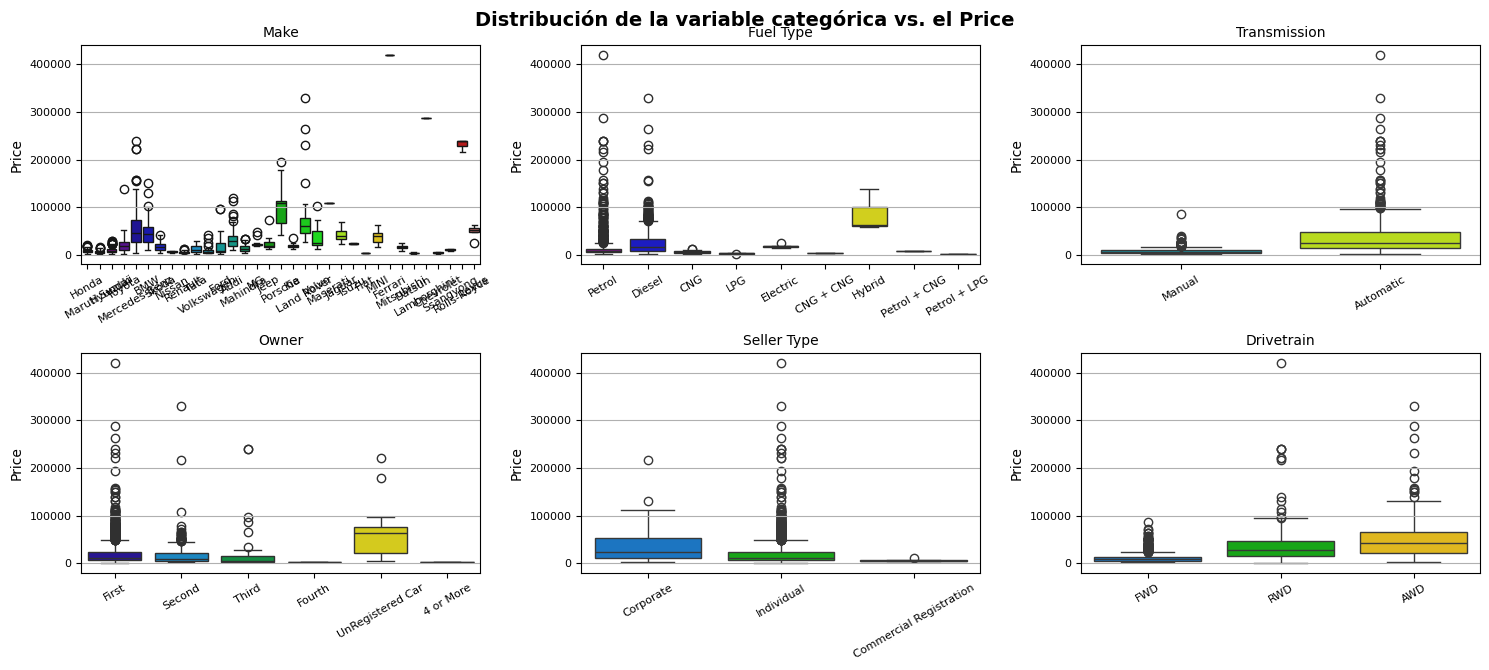

In [79]:
multiple_plot(3, d , catCols, 'Price', 'boxplot', 'Distribución de la variable categórica vs. el Price',30)

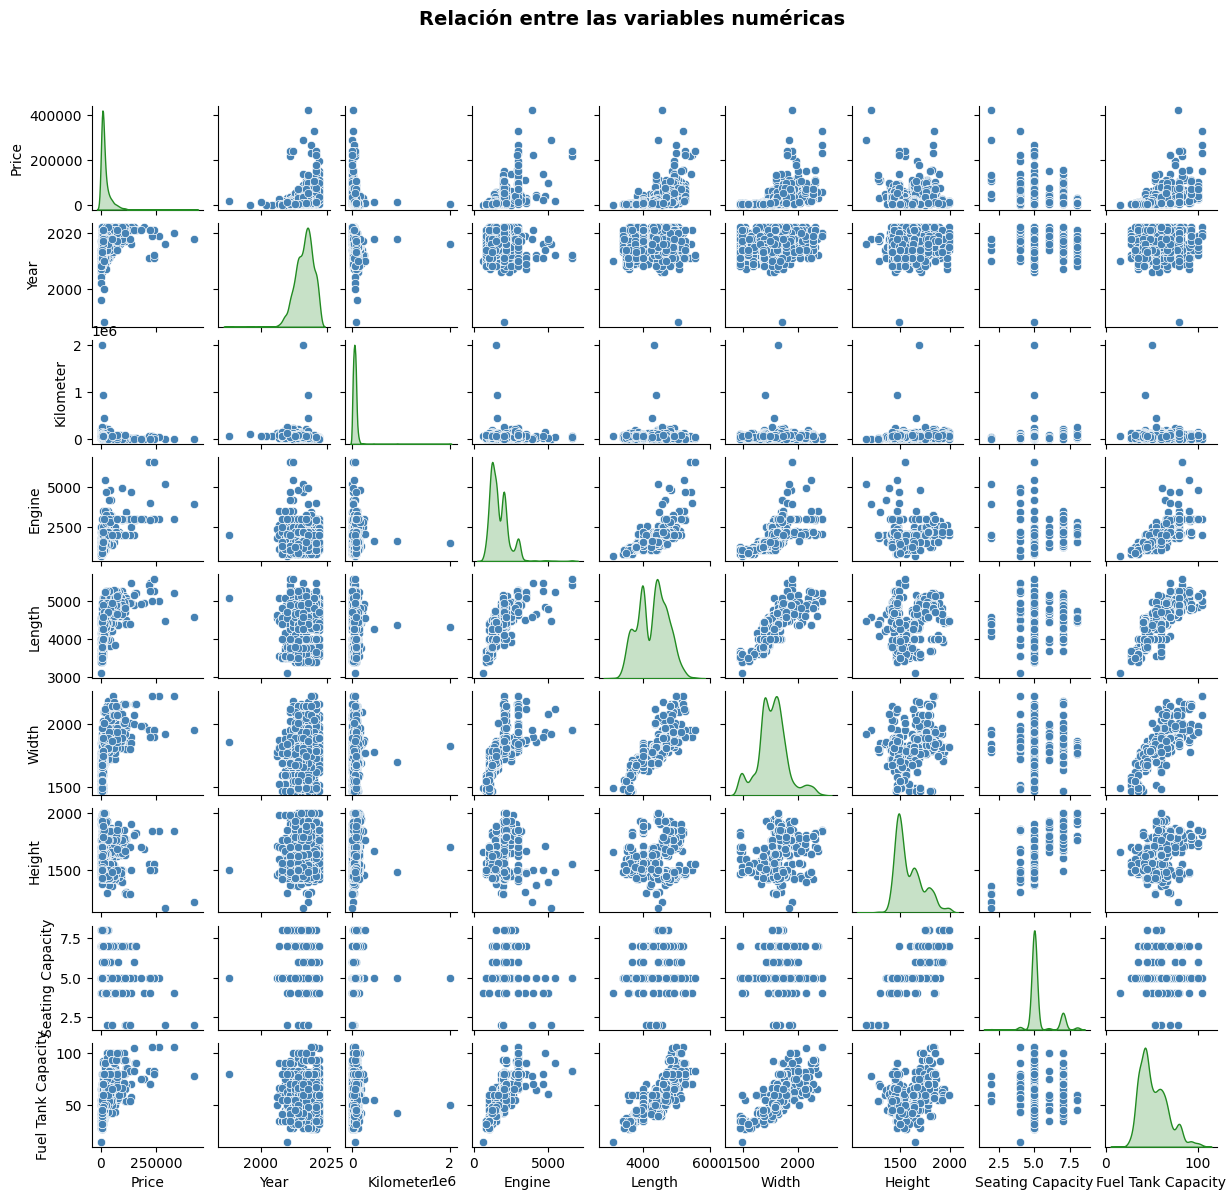

In [80]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Variable de salida

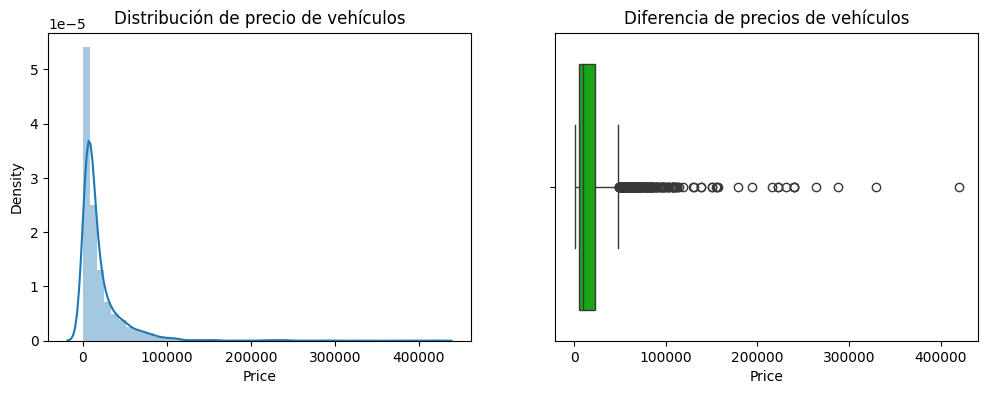

In [81]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de precio de vehículos')
sns.distplot(d['Price'])

plt.subplot(1,2,2)
plt.title('Diferencia de precios de vehículos')
sns.boxplot(x=d['Price'], palette='nipy_spectral')

plt.show()

In [82]:
#Descripción del precio de los vehículos: Total, media, desviación, mínimo, máximo y percentiles

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(d['Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count     2053
mean     20417
std      29034
min        588
25%       5820
50%       9900
75%      23100
85%      37200
90%      49800
95%      70440
97.5%    89394
100%    420000
max     420000
Name: Price, dtype: float64


## 6. Preparación de datos

### Valores atípicos de la variable de salida

In [83]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(d['Price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(d['Price'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')


Valor atípico leve inferior:-20100.029999999995
Valor atípico leve superior:49020.018


In [84]:
# Se eliminan los valores atípicos
d = d.drop(d[d['Price']>VASup].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

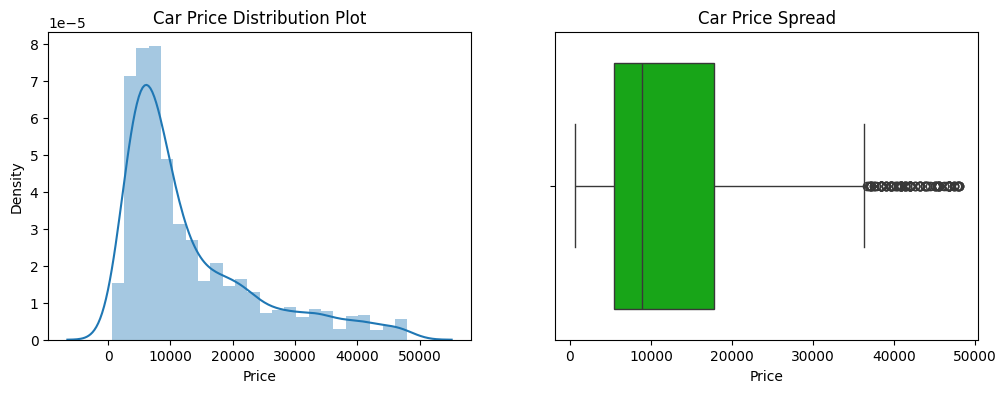

In [85]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(d['Price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=d['Price'], palette='nipy_spectral')

plt.show()

In [86]:
#Descripción del precio de los vehículos después de eliminar valores atípicos

print(d['Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count    1839
mean    13006
std     10678
min       588
25%      5400
50%      8880
75%     17760
85%     23898
90%     29990
95%     37500
97.5%   42000
100%    48000
max     48000
Name: Price, dtype: float64


### Imputaciones

In [87]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

Price 0
Year 0
Kilometer 0
Engine 75
Length 59
Width 59
Height 59
Seating Capacity 59
Fuel Tank Capacity 95


In [88]:
# Registros donde varias características (Length, Length, Height y Seating Capacity) son vacías
d.loc[d['Length'].isna() & d['Width'].isna() & d['Height'].isna() & d['Seating Capacity'].isna()]

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
33,Honda,10320,2013,67000,Petrol,Automatic,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,Audi,15000,2012,50000,Diesel,Automatic,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Mercedes-Benz,46800,2018,83400,Diesel,Automatic,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Honda,2748,2013,38175,Petrol,Manual,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Maruti Suzuki,2520,2011,58888,Petrol,Manual,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,BMW,9600,2012,75576,Diesel,Automatic,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Maruti Suzuki,3600,2011,90000,Petrol,Manual,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,Jaguar,22500,2014,66000,Diesel,Automatic,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,Volkswagen,3480,2014,125000,Diesel,Manual,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,Audi,11700,2012,93417,Diesel,Automatic,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Se eliminan aquiellas donde todas sus variables numéricas son vacías NaN
d = d.dropna(subset=['Length', 'Width', 'Height', 'Seating Capacity'])

In [90]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

Price 0
Year 0
Kilometer 0
Engine 16
Length 0
Width 0
Height 0
Seating Capacity 0
Fuel Tank Capacity 36


In [91]:
#Imputación de variables numéricas por medio de KNNImputer

# crear un objeto KNNImputer con k=5
imputer = KNNImputer(n_neighbors=5)

# imputar los valores faltantes en el dataframe
df_imputed = imputer.fit_transform(d[numCols])

# convertir el arreglo numpy devuelto por el imputer en un dataframe
df_imputed = pd.DataFrame(df_imputed, columns=numCols)

# imprimir el dataframe con los valores imputados
df_imputed.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,6060,2017,87150,1198,3990,1680,1505,5,35
1,5400,2014,75000,1248,3995,1695,1555,5,42
2,2640,2011,67000,1197,3585,1595,1550,5,35
3,9588,2019,37500,1197,3995,1745,1510,5,37
4,23400,2018,69000,2393,4735,1830,1795,7,55


In [92]:
#Identificación de valores nulos para las variables categorica
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

Make 0
Fuel Type 0
Transmission 0
Owner 0
Seller Type 0
Drivetrain 72


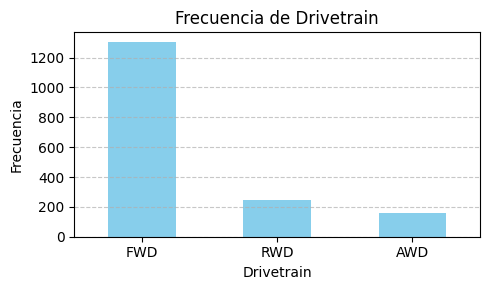

In [93]:
# Graficar la frecuencia de Drivetrain

plt.figure(figsize=(5, 3))
d['Drivetrain'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Drivetrain')
plt.xlabel('Drivetrain')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar etiquetas en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [94]:
#Imputación de variables categóricas por medio de SimpleImputer

# crear un objeto SimpleImputer con la estrategia de más frecuente
imputer = SimpleImputer(strategy='most_frequent')

# imputar los valores faltantes en el dataframe
df_imputed2 = imputer.fit_transform(d[catCols])

# convertir el arreglo numpy devuelto por el imputer en un dataframe
df_imputed2 = pd.DataFrame(df_imputed2, columns=catCols)

#imprimir el dataframe con los valores imputados
df_imputed2

,Make,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Second,Individual,FWD
2,Hyundai,Petrol,Manual,First,Individual,FWD
3,Toyota,Petrol,Manual,First,Individual,FWD
4,Toyota,Diesel,Manual,First,Individual,RWD
...,...,...,...,...,...,...
1775,Maruti Suzuki,Petrol,Manual,Second,Individual,FWD
1776,Mahindra,Diesel,Manual,First,Individual,FWD
1777,Hyundai,Petrol,Manual,Second,Individual,FWD
1778,Ford,Petrol,Manual,First,Individual,FWD


In [95]:
#Integración de los dos dataframes (categoricos y numéricos) después de la imputación
d = pd.merge(df_imputed, df_imputed2, left_index=True, right_index=True)
d.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Make,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,6060,2017,87150,1198,3990,1680,1505,5,35,Honda,Petrol,Manual,First,Corporate,FWD
1,5400,2014,75000,1248,3995,1695,1555,5,42,Maruti Suzuki,Diesel,Manual,Second,Individual,FWD
2,2640,2011,67000,1197,3585,1595,1550,5,35,Hyundai,Petrol,Manual,First,Individual,FWD
3,9588,2019,37500,1197,3995,1745,1510,5,37,Toyota,Petrol,Manual,First,Individual,FWD
4,23400,2018,69000,2393,4735,1830,1795,7,55,Toyota,Diesel,Manual,First,Individual,RWD


In [96]:
#verificación de la imputación: No existen valores nulos
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

Price 0
Year 0
Kilometer 0
Engine 0
Length 0
Width 0
Height 0
Seating Capacity 0
Fuel Tank Capacity 0
Make 0
Fuel Type 0
Transmission 0
Owner 0
Seller Type 0
Drivetrain 0


### Valores atípicos para las variables de entrada

In [97]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d[outliers].index.tolist())


Indices de valores atípicos:  [2, 39, 66, 86, 91, 105, 106, 109, 111, 114, 124, 127, 139, 150, 157, 167, 174, 185, 188, 207, 213, 217, 218, 233, 241, 242, 274, 284, 285, 339, 344, 348, 365, 382, 395, 396, 397, 410, 432, 434, 447, 453, 455, 462, 463, 464, 490, 504, 515, 517, 520, 533, 536, 540, 550, 557, 564, 590, 595, 600, 605, 619, 620, 630, 636, 639, 641, 642, 644, 676, 677, 683, 685, 695, 705, 735, 740, 750, 751, 753, 768, 769, 779, 791, 793, 811, 842, 850, 864, 870, 880, 894, 898, 901, 933, 934, 957, 969, 984, 986, 990, 1004, 1010, 1026, 1040, 1041, 1042, 1043, 1050, 1051, 1070, 1096, 1098, 1141, 1145, 1153, 1163, 1168, 1174, 1188, 1208, 1211, 1229, 1234, 1260, 1263, 1282, 1291, 1297, 1306, 1313, 1314, 1315, 1324, 1327, 1385, 1386, 1389, 1393, 1395, 1399, 1406, 1410, 1411, 1413, 1415, 1417, 1420, 1426, 1473, 1483, 1515, 1522, 1551, 1553, 1556, 1573, 1602, 1607, 1611, 1615, 1637, 1650, 1659, 1665, 1674, 1687, 1690, 1699, 1720, 1721, 1723, 1729, 1730, 1744, 1746, 1750, 1767]


In [98]:
# Eliminar los valores atípicos del dataframe original
d = d.loc[~outliers]

### Transformaciones

In [99]:
#Eliminación de categorias pequeñas para la variable Fuel Type

d['Fuel Type'].value_counts().sort_values(ascending=False)

,count
Fuel Type,
Petrol,777
Diesel,767
CNG,48
Electric,7
CNG + CNG,1
LPG,1
Petrol + CNG,1


In [100]:
#Diccionario con los reemplazos a realizar
reemplazos = { "CNG": "Otro"
              ,"Electric": "Otro"
              , "LPG": "Otro"
              , "CNG + CNG": "Otro"
              , "Petrol + CNG": "Otro"
              , "Petrol + LPG": "Otro"}


#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
d['Fuel Type'] = d['Fuel Type'].map(reemplazos).fillna(d['Fuel Type'])

#Visualización de las nuevos valores agrupados para la categoria 'Fuel Type'
d['Fuel Type'].value_counts().sort_values(ascending=False)

,count
Fuel Type,
Petrol,777
Diesel,767
Otro,58


In [101]:
#pd.set_option('display.max_rows')
pd.reset_option('display.max_rows')

In [102]:
#Discretización (binning) de la variable 'Make'

#Cantidad de instancias por Make
d['Make'].value_counts().sort_values(ascending=False)

,count
Make,
Maruti Suzuki,400
Hyundai,315
Honda,142
Toyota,104
Mahindra,101
Audi,87
Mercedes-Benz,72
BMW,54
Tata,50


In [103]:
#Se Calcula la mediana por marca 'Make'

d.groupby('Make').Price.median().sort_values(ascending=False)

,Price
Make,
Lexus,46800
Land Rover,39900
Jaguar,38694
MINI,38400
BMW,31500
Mercedes-Benz,26850
Audi,26400
Isuzu,23346
MG,21840


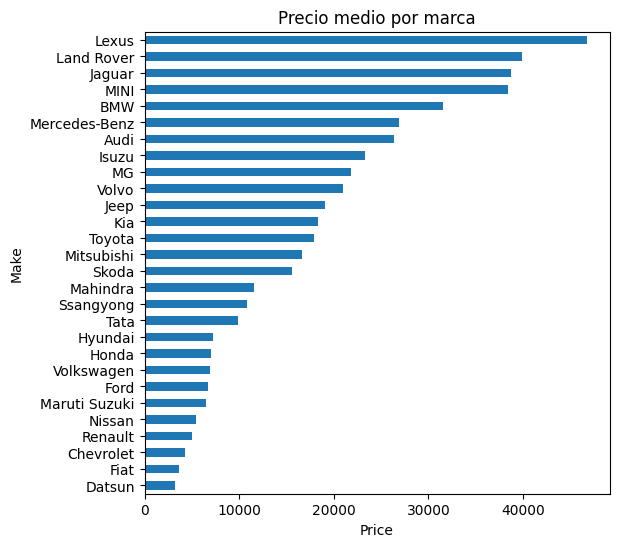

In [104]:
#Gráfica de visualización de precio medio por marca 'Make'
plt.figure(figsize=(6, 6))

d.groupby('Make').Price.median().sort_values(ascending=True).plot.barh()
plt.title("Precio medio por marca")
plt.ylabel("Make")
plt.xlabel("Price")
plt.show()

In [105]:
df= d.groupby('Make').Price.median().sort_values(ascending=False)
df=df.reset_index()
df.head(10)

,Make,Price
0,Lexus,46800
1,Land Rover,39900
2,Jaguar,38694
3,MINI,38400
4,BMW,31500
5,Mercedes-Benz,26850
6,Audi,26400
7,Isuzu,23346
8,MG,21840
9,Volvo,20934


In [106]:
#Se crea una nueva variable que establece el un bin de acuerdo al precio medio por marca

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#Se define el numero de bins que se quieren crear
numBins = 5

#Se identifica el maximo valor
max_value = df["Price"].max()

#Se crea la nueva variable PriceRange dando el mayor valor al mayor precio medio
df['PriceRange'] = df['Price'].apply(lambda x: int(round(x / (max_value/numBins))))


df

,Make,Price,PriceRange
0,Lexus,46800.0000,5
1,Land Rover,39900.0000,4
2,Jaguar,38694.0000,4
3,MINI,38400.0000,4
4,BMW,31500.0000,3
5,Mercedes-Benz,26850.0000,3
6,Audi,26400.0000,3
7,Isuzu,23346.0000,2
8,MG,21839.9940,2
9,Volvo,20933.9880,2


In [107]:
#Se adiciona la nueva variable al dataset original
d=pd.merge(d, df[['Make','PriceRange']], on='Make', how='left')

#Se elimina la variable Make
d = d.drop(['Make'], axis=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1602 non-null   float64
 1   Year                1602 non-null   float64
 2   Kilometer           1602 non-null   float64
 3   Engine              1602 non-null   float64
 4   Length              1602 non-null   float64
 5   Width               1602 non-null   float64
 6   Height              1602 non-null   float64
 7   Seating Capacity    1602 non-null   float64
 8   Fuel Tank Capacity  1602 non-null   float64
 9   Fuel Type           1602 non-null   object 
 10  Transmission        1602 non-null   object 
 11  Owner               1602 non-null   object 
 12  Seller Type         1602 non-null   object 
 13  Drivetrain          1602 non-null   object 
 14  PriceRange          1602 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 187.9+

In [108]:
numCols.append('PriceRange')
numCols

['Price',
 'Year',
 'Kilometer',
 'Engine',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'PriceRange']

In [109]:
catCols.remove('Make')
catCols

['Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Drivetrain']

### Datos de prueba

In [110]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.90

# Número de filas para la primera parte
n_rows_part1 = int(len(d) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = d.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = d.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df = d.loc[indices_part1]
dp = d.loc[indices_part2]

In [111]:
dp.shape

(161, 15)

## 7. Exportar el dataset

In [112]:
# Exportamos el dataframe a un archivo CSV
df.to_csv(DATASET_PATH + '01_carDetailsV4_Prep.csv', index=False)
dp.to_csv(DATASET_PATH + '01_carDetailsV4_Prue.csv', index=False)

In [113]:
df.head(10)

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Fuel Type,Transmission,Owner,Seller Type,Drivetrain,PriceRange
912,9540.0000,2021.0000,9000.0000,1199.0000,3993.0000,1677.0000,1532.0000,5.0000,35.0000,Petrol,Automatic,First,Individual,FWD,1
772,10500.0000,2014.0000,99000.0000,2199.0000,4690.0000,1880.0000,1690.0000,7.0000,64.0000,Diesel,Automatic,First,Corporate,AWD,1
1037,17400.0000,2014.0000,45000.0000,2143.0000,4596.0000,1770.0000,1447.0000,5.0000,66.0000,Diesel,Automatic,First,Individual,RWD,3
1106,11400.0000,2018.0000,63000.0000,1396.0000,4270.0000,1780.0000,1630.0000,5.0000,60.0000,Diesel,Manual,First,Individual,FWD,1
263,26100.0000,2017.0000,29000.0000,2393.0000,4735.0000,1830.0000,1795.0000,7.0000,55.0000,Diesel,Manual,First,Individual,RWD,2
1029,31200.0000,2014.0000,94000.0000,2997.0000,4804.0000,2141.0000,1796.0000,5.0000,70.0000,Diesel,Automatic,First,Individual,AWD,3
935,6600.0000,2016.0000,88000.0000,1248.0000,3995.0000,1745.0000,1500.0000,5.0000,37.0000,Diesel,Manual,First,Individual,FWD,1
1439,18000.0000,2019.0000,75000.0000,2179.0000,4585.0000,1890.0000,1785.0000,7.0000,70.0000,Diesel,Manual,First,Individual,FWD,1
31,6420.0000,2015.0000,28000.0000,999.0000,3999.0000,1765.0000,1708.0000,5.0000,52.0000,Petrol,Manual,First,Individual,FWD,1
512,5988.0000,2014.0000,140000.0000,1498.0000,4440.0000,1695.0000,1495.0000,5.0000,40.0000,Diesel,Manual,First,Individual,FWD,1


### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  